# Junior Data Scientist Task - Tymit

In this section we will be working through the provided dataset with the following steps:

    A. Descriptive Analysis
        1. Getting and setting up the data
        2. Priority Distribution
        3. Time Resolution Distribution
        4. Task created by Week Days
     
    B. Trend Analysis & Data Management
        1. Evolution of Tasks Along Time
    C. Modelling and Prediction
    D. Communication
    

# A. Description Analysis

### 1. Getting and setting up the data

First we'll import our usual data analysis imports.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from datetime import datetime, timedelta
import datetime

Imports for plotting.

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('whitegrid')

# Command so that plots appear in the iPython Notebook
%matplotlib inline

Imports for modelling

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import make_column_transformer
#from sklearn import metrics


Retrieve dataset from csv file to pandas DataFrame.

In [4]:
file = 'src/test_data.csv'
df_raw = pd.read_csv(file)

Display head of the dataframe.

In [5]:
pd.set_option('display.max_columns', None)
df_raw.head()

,Key,Date_Created,Date_Resolution,Date_Updated,Priority,Status_Name,has_cifas,has_edd,has_noc,has_thin_file,time_to_resolution
0,TSD-100,2020-01-09 12:33:23,2020-01-15 11:36:23,2020-02-02 12:24:00,Medium,Done,0,0,0,0,5
1,TSD-1003,2020-02-12 23:21:33,2020-02-13 00:09:13,2020-02-13 00:09:13,Medium,Done,0,1,0,0,0
2,TSD-1005,2020-02-13 00:13:23,2020-02-15 18:41:10,2020-02-15 18:41:10,High,Done,0,1,0,0,2
3,TSD-1025,2020-02-13 14:15:29,2020-02-14 00:06:49,2020-02-14 00:06:49,Medium,Done,1,1,0,0,0
4,TSD-1028,2020-02-13 16:43:29,NaN,2020-02-15 18:37:08,High,Escalated,0,1,0,0,7


Check column datatypes

In [6]:
print('Columns datetypes:')
df_raw.dtypes

Columns datetypes:


Key                   object
Date_Created          object
Date_Resolution       object
Date_Updated          object
Priority              object
Status_Name           object
has_cifas              int64
has_edd                int64
has_noc                int64
has_thin_file          int64
time_to_resolution     int64
dtype: object

Let's convert string dates (object) into datetime datatype

In [7]:
columns_2convert_2datetime = ['Date_Created','Date_Resolution','Date_Updated']
for column in columns_2convert_2datetime:
    df_raw[column] = pd.to_datetime(df_raw[column])
#Save processed dataframe with different name
df = df_raw.copy()

In [8]:
df.dtypes

Key                           object
Date_Created          datetime64[ns]
Date_Resolution       datetime64[ns]
Date_Updated          datetime64[ns]
Priority                      object
Status_Name                   object
has_cifas                      int64
has_edd                        int64
has_noc                        int64
has_thin_file                  int64
time_to_resolution             int64
dtype: object

### 2. Priority Distribution

Let's see how tasks are prioritized

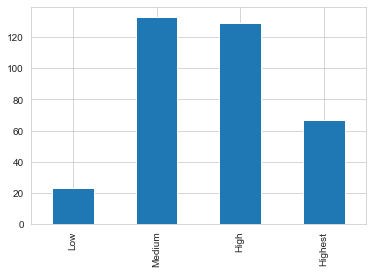

In [9]:
df['Priority'].value_counts().reindex(['Low', 'Medium','High','Highest']).plot(kind='bar')

### 3. Time Resolution Distribution

Let's see in how many days tasks are resoluted

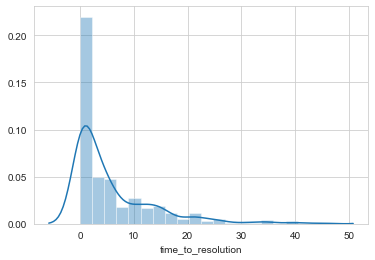

In [10]:
sns.distplot(df['time_to_resolution'])

### 4. Task created by Week Days

Let's create a new column for that purpose

In [11]:
df['Weekday_Created'] = df['Date_Created'].dt.day_name()

In [12]:
df.head()

,Key,Date_Created,Date_Resolution,Date_Updated,Priority,Status_Name,has_cifas,has_edd,has_noc,has_thin_file,time_to_resolution,Weekday_Created
0,TSD-100,2020-01-09 12:33:23,2020-01-15 11:36:23,2020-02-02 12:24:00,Medium,Done,0,0,0,0,5,Thursday
1,TSD-1003,2020-02-12 23:21:33,2020-02-13 00:09:13,2020-02-13 00:09:13,Medium,Done,0,1,0,0,0,Wednesday
2,TSD-1005,2020-02-13 00:13:23,2020-02-15 18:41:10,2020-02-15 18:41:10,High,Done,0,1,0,0,2,Thursday
3,TSD-1025,2020-02-13 14:15:29,2020-02-14 00:06:49,2020-02-14 00:06:49,Medium,Done,1,1,0,0,0,Thursday
4,TSD-1028,2020-02-13 16:43:29,NaT,2020-02-15 18:37:08,High,Escalated,0,1,0,0,7,Thursday


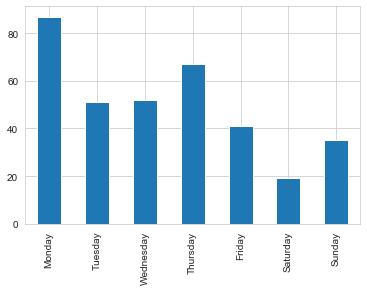

In [13]:
week_days = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday_Created'].value_counts().reindex(week_days).plot(kind='bar')

# B. Trend Analysis & Data Management

### 1. Evolution of Tasks Along Time

In [14]:
# Create week number column on dataframe for tasks created and resoluted
df['Week_Num_Created'] = df['Date_Created'].dt.week
df['Week_Num_Resoluted'] = df['Date_Resolution'].dt.week

In [15]:
df.head()

,Key,Date_Created,Date_Resolution,Date_Updated,Priority,Status_Name,has_cifas,has_edd,has_noc,has_thin_file,time_to_resolution,Weekday_Created,Week_Num_Created,Week_Num_Resoluted
0,TSD-100,2020-01-09 12:33:23,2020-01-15 11:36:23,2020-02-02 12:24:00,Medium,Done,0,0,0,0,5,Thursday,2,3.0
1,TSD-1003,2020-02-12 23:21:33,2020-02-13 00:09:13,2020-02-13 00:09:13,Medium,Done,0,1,0,0,0,Wednesday,7,7.0
2,TSD-1005,2020-02-13 00:13:23,2020-02-15 18:41:10,2020-02-15 18:41:10,High,Done,0,1,0,0,2,Thursday,7,7.0
3,TSD-1025,2020-02-13 14:15:29,2020-02-14 00:06:49,2020-02-14 00:06:49,Medium,Done,1,1,0,0,0,Thursday,7,7.0
4,TSD-1028,2020-02-13 16:43:29,NaT,2020-02-15 18:37:08,High,Escalated,0,1,0,0,7,Thursday,7,NaN


Let's group by the week numbers and count the number of tasks created

In [16]:
df_tc = df[['Key','Week_Num_Created']]
df_tc = df_tc.groupby(['Week_Num_Created']).count().reset_index()
df_tc = df_tc.rename(columns={'Key':'Tasks_Created'})
df_tc

,Week_Num_Created,Tasks_Created
0,1,5
1,2,28
2,3,31
3,4,21
4,5,67
5,6,62
6,7,108
7,8,30


Let's group by the week numbers and count the number of tasks resoluted

In [17]:
df_tr = df[['Key','Week_Num_Resoluted']]
df_tr = df_tr.groupby(['Week_Num_Resoluted']).count().reset_index()
df_tr['Week_Num_Resoluted'] = df_tr['Week_Num_Resoluted'].astype(int)
df_tr = df_tr.rename(columns={'Key':'Tasks_Resoluted'})
df_tr

,Week_Num_Resoluted,Tasks_Resoluted
0,2,8
1,3,24
2,4,21
3,5,40
4,6,48
5,7,89
6,8,51


Let's join this two dataframe in a single one to plot in the same graph tasks created and resoluted

In [18]:
df_join = pd.merge(df_tc, df_tr, left_on='Week_Num_Created', right_on = 'Week_Num_Resoluted', how='outer')

In [19]:
df_join['Tasks_Resoluted'].fillna(0, inplace=True) # convert Nan to 0
del df_join['Week_Num_Resoluted'] # Eliminate redundant columns

The following table shows the tasks created and resoluted over the weekend of the year

In [20]:
df_join

,Week_Num_Created,Tasks_Created,Tasks_Resoluted
0,1,5,0.0
1,2,28,8.0
2,3,31,24.0
3,4,21,21.0
4,5,67,40.0
5,6,62,48.0
6,7,108,89.0
7,8,30,51.0


The following plot displays the information of the table in a visual way

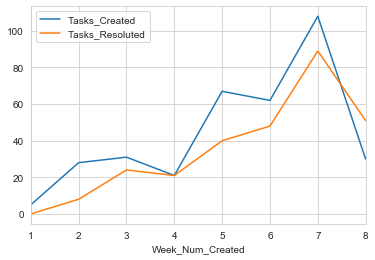

In [21]:
df_join.plot(x='Week_Num_Created', y=['Tasks_Created','Tasks_Resoluted'])
plt.show()

# C. Modelling and Prediction

We are asked to estimae the 'Date_Resolution' and 'time_to_resolution' using the available dataset. Since the task date creation is available and the 'Date_Resolution' can be easily infered adding to it the 'time_to_resolution', let's use a numerical variable as dependent, that is to say, 'time_to_resolution'.

In [33]:
# Check avaialble dataset
df_raw.head()

,Key,Date_Created,Date_Resolution,Date_Updated,Priority,Status_Name,has_cifas,has_edd,has_noc,has_thin_file,time_to_resolution
0,TSD-100,2020-01-09 12:33:23,2020-01-15 11:36:23,2020-02-02 12:24:00,Medium,Done,0,0,0,0,5
1,TSD-1003,2020-02-12 23:21:33,2020-02-13 00:09:13,2020-02-13 00:09:13,Medium,Done,0,1,0,0,0
2,TSD-1005,2020-02-13 00:13:23,2020-02-15 18:41:10,2020-02-15 18:41:10,High,Done,0,1,0,0,2
3,TSD-1025,2020-02-13 14:15:29,2020-02-14 00:06:49,2020-02-14 00:06:49,Medium,Done,1,1,0,0,0
4,TSD-1028,2020-02-13 16:43:29,NaT,2020-02-15 18:37:08,High,Escalated,0,1,0,0,7


Let's set the columns we want to use so we can reuse easily the code for other datasets.

In [23]:
# Config
dependent_variable = ['time_to_resolution']
independent_variables = ['Priority', 'has_cifas', 'has_edd', 'has_noc', 'has_thin_file']
categorical_variables = ['Priority']
datetime_variables = ['hiring_starts_on','hiring_ends_on']

Let's start creating a working dataframe and converting the categorial variables into numerical using one hot encondig.

In [24]:
# Create working dataframe
df_w = df[independent_variables]
df_w.head()

,Priority,has_cifas,has_edd,has_noc,has_thin_file
0,Medium,0,0,0,0
1,Medium,0,1,0,0
2,High,0,1,0,0
3,Medium,1,1,0,0
4,High,0,1,0,0


In [25]:
# Convert categorical variables to one hot encoding
df_temp = pd.get_dummies(df_raw[categorical_variables], drop_first=False)
df_temp.head()

# Add  result to working dataframe
df_w = pd.concat([df_w,df_temp], axis='columns')

# Drop original categorical columns
df_w.drop(categorical_variables, axis=1, inplace=True)

# Show results
df_w.head()

,has_cifas,has_edd,has_noc,has_thin_file,Priority_High,Priority_Highest,Priority_Low,Priority_Medium
0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1
2,0,1,0,0,1,0,0,0
3,1,1,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0


We split the dataset into a training and a test subset.

In [26]:
X = df_w
y = df[dependent_variable]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05)

We train the model using the the train subset.

In [28]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We make a prediction using the test subset.

In [29]:
y_pred = linreg.predict(X_test)

Let's evaluate the prediction.

In [30]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [31]:
#Closer to 1 better is the prediction
score

0.07782537893882402